In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import Risk_Kit as erk
import numpy as np
import pandas as pd

In [2]:
ind = erk.get_ind_returns()
er = erk.annualized_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

In [3]:
def portfolio_return(weights, returns):
    return weights.T @ returns 

def portfolio_vol(weights, covmat):
    return (weights.T @ covmat @ weights)**0.5


In [4]:
l = ["Food","Beer","Smoke","Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [5]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [6]:
weights = np.array([0.25, 0.5,0.75,1])

In [7]:
weights

array([0.25, 0.5 , 0.75, 1.  ])

In [8]:
(weights.T @ cov.loc[l, l] @ weights) **0.5

0.1668685544571875

In [9]:
erk.portfolio_return(weights, er[l])

0.5953243772641041

In [10]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.1668685544571875

In [11]:
l = ["Games","Fin"]

In [12]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

In [13]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [14]:
type([np.array([0.5, 0.5])])


list

<AxesSubplot:xlabel='Vol', ylabel='R'>

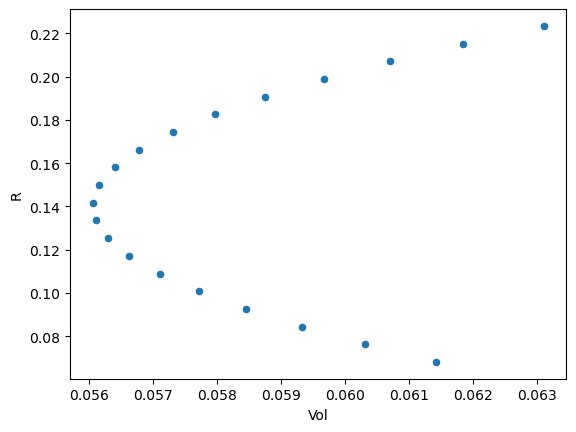

In [15]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame ({"R":rets,"Vol":vols})

ef.plot.scatter(x="Vol", y="R")

<AxesSubplot:xlabel='Volatility'>

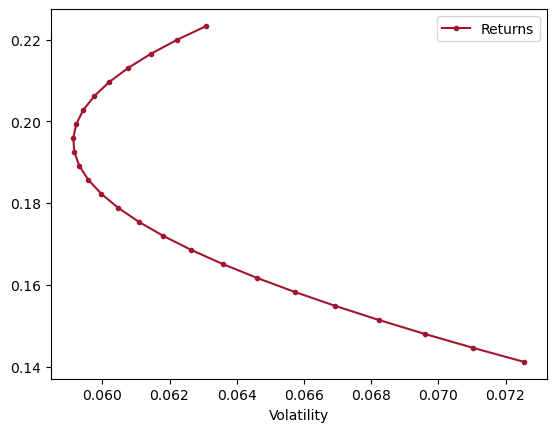

In [16]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l], cov.loc[l,l], style=".-")